In [36]:
!pip install matplotlib
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [37]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
dataset = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [15]:
dataset.pop('name')
dataset

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [16]:
dataset = pd.get_dummies(dataset, columns=['fuel', 'seller_type', 'transmission', 'owner'], prefix='', prefix_sep='')
dataset

,year,selling_price,km_driven,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2007,60000,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4336,2014,409999,80000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4337,2009,110000,83000,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4338,2016,865000,90000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0


In [17]:
X = dataset
y = dataset.pop('selling_price')
print(X)
print(y)

      year  km_driven  CNG  Diesel  Electric  LPG  Petrol  Dealer  Individual  \
0     2007      70000    0       0         0    0       1       0           1   
1     2007      50000    0       0         0    0       1       0           1   
2     2012     100000    0       1         0    0       0       0           1   
3     2017      46000    0       0         0    0       1       0           1   
4     2014     141000    0       1         0    0       0       0           1   
...    ...        ...  ...     ...       ...  ...     ...     ...         ...   
4335  2014      80000    0       1         0    0       0       0           1   
4336  2014      80000    0       1         0    0       0       0           1   
4337  2009      83000    0       0         0    0       1       0           1   
4338  2016      90000    0       1         0    0       0       0           1   
4339  2016      40000    0       0         0    0       1       0           1   

      Trustmark Dealer  Aut

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3038, 17) (3038,)
(1302, 17) (1302,)


In [19]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())

[2.0130885e+03 6.6034094e+04 1.0533245e-02 4.9802503e-01 0.0000000e+00
 5.5957865e-03 4.8584595e-01 2.2514813e-01 7.5148124e-01 2.3370638e-02
 1.0500329e-01 8.9499670e-01 6.4779460e-01 1.8104015e-02 2.5905201e-01
 3.9499672e-03 7.1099408e-02]


In [20]:
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[  2011 100000      0      1      0      0      0      0      1      0
       0      1      0      0      1      0      0]]

Normalized: [[-0.49  0.72 -0.1   1.    0.   -0.08 -0.97 -0.54  0.58 -0.15 -0.34  0.34
  -1.36 -0.14  1.69 -0.06 -0.28]]


In [73]:
model = tf.keras.Sequential([
    normalizer,
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 17)                35        
_________________________________________________________________
dense_31 (Dense)             (None, 128)               2304      
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_36 (Dense)             (None, 64)               

In [74]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

history = model.fit(
    X_train, y_train,
    epochs=200,
    verbose=2,
    validation_split = 0.2)

Epoch 1/200
76/76 - 1s - loss: 491557.6250 - val_loss: 413542.8750
Epoch 2/200
76/76 - 0s - loss: 248336.9688 - val_loss: 202789.8125
Epoch 3/200
76/76 - 0s - loss: 199775.1562 - val_loss: 197156.0469
Epoch 4/200
76/76 - 0s - loss: 192407.2500 - val_loss: 189992.2500
Epoch 5/200
76/76 - 0s - loss: 190828.3750 - val_loss: 186173.1719
Epoch 6/200
76/76 - 0s - loss: 187338.6719 - val_loss: 183024.3281
Epoch 7/200
76/76 - 0s - loss: 186350.6562 - val_loss: 182080.2031
Epoch 8/200
76/76 - 0s - loss: 185096.3281 - val_loss: 181109.5000
Epoch 9/200
76/76 - 0s - loss: 183841.7969 - val_loss: 182061.4219
Epoch 10/200
76/76 - 0s - loss: 182895.7969 - val_loss: 180031.7812
Epoch 11/200
76/76 - 0s - loss: 182865.5781 - val_loss: 179904.7656
Epoch 12/200
76/76 - 0s - loss: 181543.9531 - val_loss: 182618.8281
Epoch 13/200
76/76 - 0s - loss: 181097.4844 - val_loss: 179116.2500
Epoch 14/200
76/76 - 0s - loss: 179616.0781 - val_loss: 178124.8906
Epoch 15/200
76/76 - 0s - loss: 179574.9844 - val_loss: 1

Epoch 122/200
76/76 - 0s - loss: 157035.5156 - val_loss: 170523.7188
Epoch 123/200
76/76 - 0s - loss: 156894.0312 - val_loss: 170206.6562
Epoch 124/200
76/76 - 0s - loss: 157488.0469 - val_loss: 172147.7031
Epoch 125/200
76/76 - 0s - loss: 157460.1719 - val_loss: 170046.1875
Epoch 126/200
76/76 - 0s - loss: 155222.5000 - val_loss: 170456.4062
Epoch 127/200
76/76 - 0s - loss: 156463.2031 - val_loss: 170163.0156
Epoch 128/200
76/76 - 0s - loss: 158153.0781 - val_loss: 173272.5312
Epoch 129/200
76/76 - 0s - loss: 159247.2969 - val_loss: 170279.9844
Epoch 130/200
76/76 - 0s - loss: 155845.6875 - val_loss: 169790.8750
Epoch 131/200
76/76 - 0s - loss: 156895.9688 - val_loss: 168573.0000
Epoch 132/200
76/76 - 0s - loss: 156403.1562 - val_loss: 169941.7969
Epoch 133/200
76/76 - 0s - loss: 156820.3438 - val_loss: 170682.8438
Epoch 134/200
76/76 - 0s - loss: 156750.4375 - val_loss: 170820.3438
Epoch 135/200
76/76 - 0s - loss: 155722.7188 - val_loss: 169011.0000
Epoch 136/200
76/76 - 0s - loss: 1

In [75]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,153876.453125,167295.703125,195
196,153966.062500,167061.062500,196
197,153087.093750,168638.375000,197
198,152821.765625,170006.156250,198
199,152783.359375,167126.515625,199


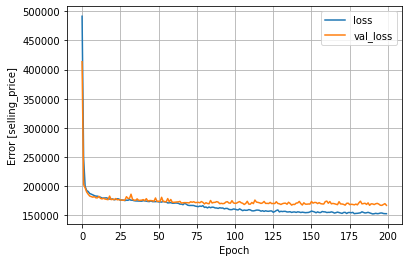

In [76]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [selling_price]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [80]:
predict_dataset = tf.convert_to_tensor([
    [2007,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0],
    [2007,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0],
    [2016,90000,0	1	0	0	0	0	1	0	0	1	1	0	0	0	0],
])
predictions = model(predict_dataset)
predictions

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[101946.18],
       [107937.68]], dtype=float32)>